In [17]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 1, 11)

df = 0.9
nt = 100
ns = 3
nc = 3
ng = 10
n_arms = ns*nc
ut = (2, 16)
th = 0.2
fr = 0.3

file1 = f'./planning-infinite/df{df}_nt{nt}_ns{ns}_ng{ng}_nc{nc}_ut{ut}_th{th}_fr{fr}_Neutral.joblib'
file2 = f'./planning-infinite/df{df}_nt{nt}_ns{ns}_ng{ng}_nc{nc}_ut{ut}_th{th}_fr{fr}_RiskAware.joblib'

# Load data from joblib files
data1 = joblib.load(file1)
data2 = joblib.load(file2)

# Extract `totalrewards` from the loaded data
totalrewards1 = data1[0]
totalrewards2 = data2[0]


arm = 0
percentage above threshold (Neutral) = 82.0
percentage above threshold (Risk-Aware) = 98.0


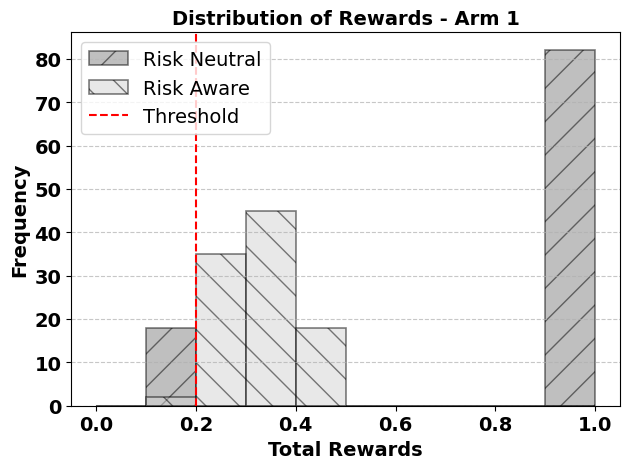

arm = 1
percentage above threshold (Neutral) = 7.0
percentage above threshold (Risk-Aware) = 95.0


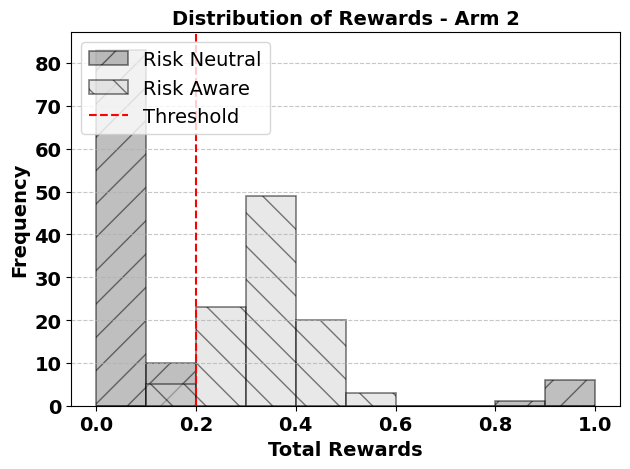

arm = 2
percentage above threshold (Neutral) = 7.0
percentage above threshold (Risk-Aware) = 97.0


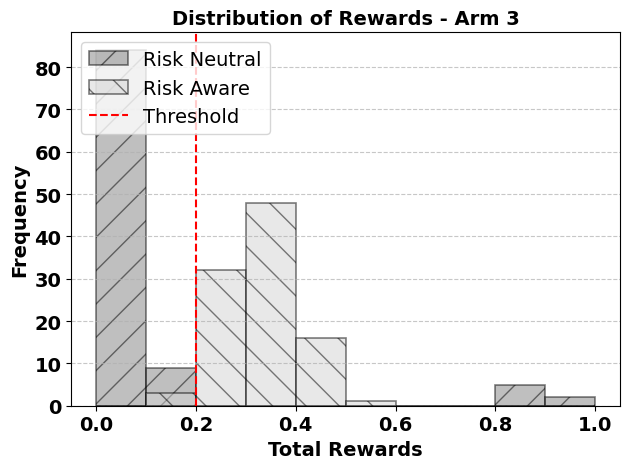

arm = 3
percentage above threshold (Neutral) = 5.0
percentage above threshold (Risk-Aware) = 100.0


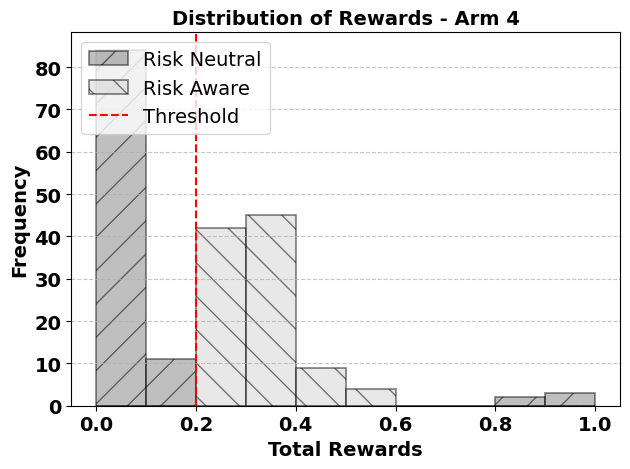

arm = 4
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 97.0


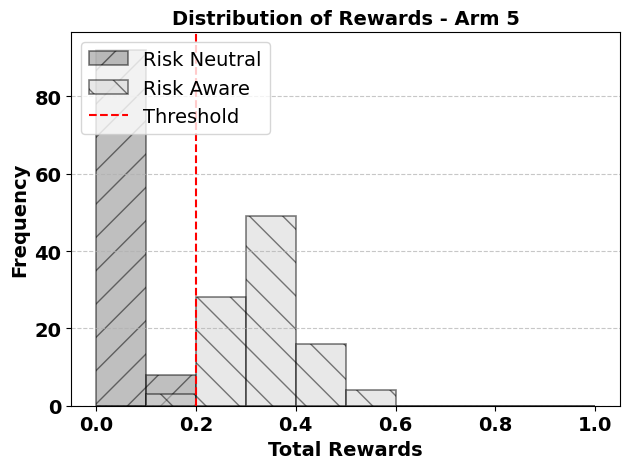

arm = 5
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 96.0


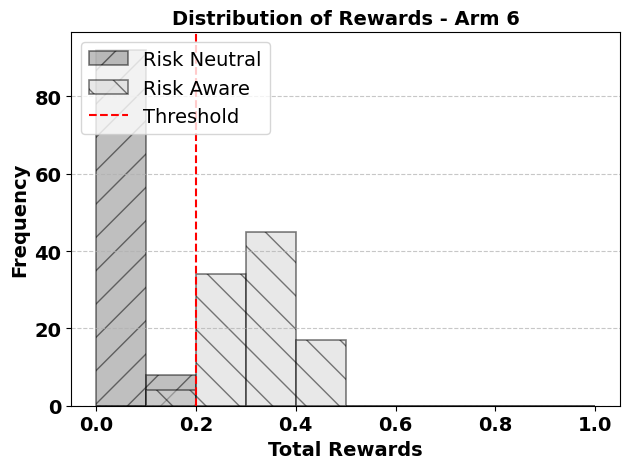

arm = 6
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 98.0


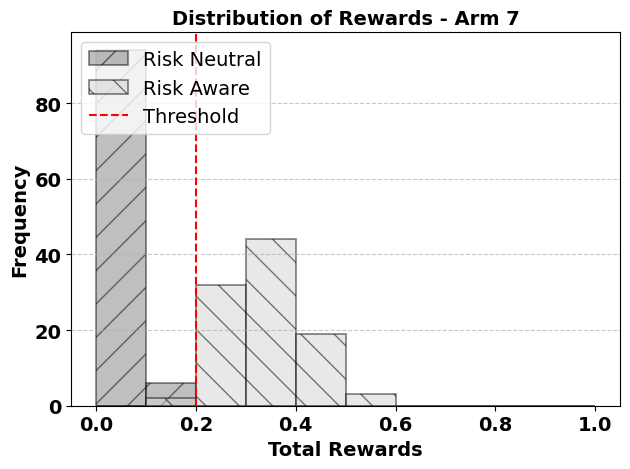

arm = 7
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 96.0


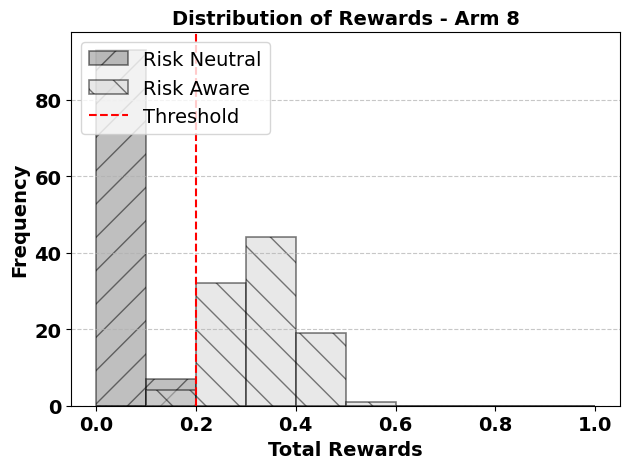

arm = 8
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 99.0


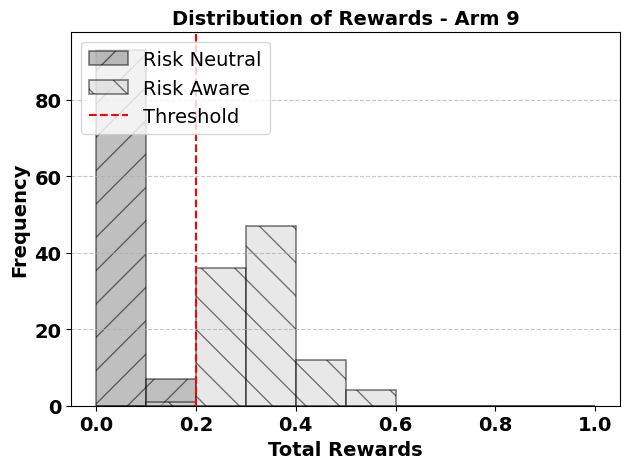

In [18]:

# Iterate over each arm and create histograms
for arm in range(n_arms):

    print('='*20)
    print(f"arm = {arm}")
    print(f"percentage above threshold (Neutral) = {100 * sum(totalrewards1[arm, :] >= th)/len(totalrewards1[arm, :])}")
    print(f"percentage above threshold (Risk-Aware) = {100 * sum(totalrewards2[arm, :] >= th)/len(totalrewards2[arm, :])}")

    plt.figure()

    # Histogram for the first file
    plt.hist(
        totalrewards1[arm, :], 
        bins=bins, 
        alpha=0.5, 
        label='Risk Neutral', 
        color='gray', 
        edgecolor='black', 
        linewidth=1.2, 
        hatch='/'  # Adding a hatch pattern for black-and-white distinction
    )

    # Histogram for the second file
    plt.hist(
        totalrewards2[arm, :], 
        bins=bins, 
        alpha=0.5, 
        label='Risk Aware', 
        color='lightgray', 
        edgecolor='black', 
        linewidth=1.2, 
        hatch='\\'  # Adding a different hatch pattern for black-and-white distinction
    )

    plt.axvline(x=th, color='red', linestyle='--', linewidth=1.5, label='Threshold')
    
    # Plot formatting
    plt.title(f'Distribution of Rewards - Arm {arm+1}', fontsize=14, fontweight='bold')
    plt.xlabel('Total Rewards', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.legend(loc='upper left', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

